# Tarjan's algorithm for Strongly connected components in a graph
## Defining the graph

In [1]:
edges = [
    (0, 1),
    (1, 2),
    (1, 4),
    (1, 6),
    (2, 3),
    (3, 2),
    (3, 4),
    (3, 5),
    (4, 5),
    (5, 4),
    (6, 2),
    (6, 0)
]

incidence_matrix = [[0 for i in range(7)] for j in range(7)]

for u, v in edges:
    incidence_matrix[u][v] = 1
    if incidence_matrix[v][u] == 0:
        incidence_matrix[v][u] = -1

incidence_matrix

[[0, 1, 0, 0, 0, 0, -1],
 [-1, 0, 1, 0, 1, 0, 1],
 [0, -1, 0, 1, 0, 0, -1],
 [0, 0, 1, 0, 1, 1, 0],
 [0, -1, 0, -1, 0, 1, 0],
 [0, 0, 0, -1, 1, 0, 0],
 [1, -1, 1, 0, 0, 0, 0]]

## Class for Graph Visualization

In [2]:
import networkx as nx 
import matplotlib.pyplot as plt 

# Defining a Class 
class GraphVisualization: 

    def __init__(self, weighted, edge_list = [], adjancency_matrix = [], isDirected = False): 
        self.weighted = weighted
        self.G = (nx.DiGraph() if isDirected else nx.Graph())
        
        if len(edge_list) > 0:
            for i in edge_list:
                self.G.add_edge(i[0], i[1], weight = i[2])
        
        elif len(adjancency_matrix) > 0:
            for i in range(len(adjancency_matrix)):
                for j in range(len(adjancency_matrix[i])):
                    if adjancency_matrix[i][j] <= 0: continue
                    self.G.add_edge(i, j, weight = adjancency_matrix[i][j])
        
        elif len(edge_list) == 0 and len(adjancency_matrix) == 0:
            raise Exception("I expect atleast an edge-list or an adjancency matrix")
    
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self):
        pos = nx.spring_layout(self.G, scale = 5000)

        # Manually scale up the positions for more spacing
        for key in pos:
            pos[key] *= 10000
        nx.draw_networkx(self.G, pos, node_size=700, node_color='#00ccff', font_size=10)

        if self.weighted:
            # Draw edge labels for weights
            labels = nx.get_edge_attributes(self.G, 'weight')
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.show()

## Visualizing the graph

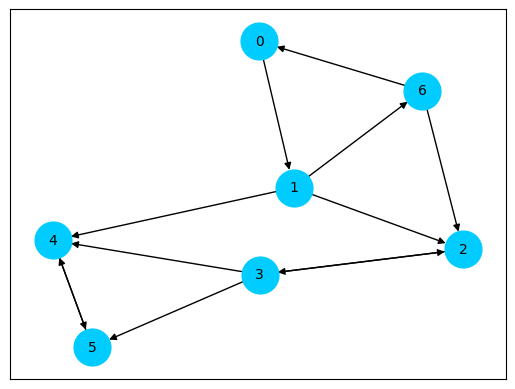

In [3]:
G1 = GraphVisualization(weighted = False, adjancency_matrix = incidence_matrix, isDirected = True)
G1.visualize()

## Algorithm
**1. Initialization**

- Set a global `index` counter to 0.
- For each vertex, create:
    - `index_map`: stores the discovery index for each vertex (initialized as "unvisited").
    - `low_link`: stores the lowest discovery index reachable from the vertex (including itself).
    - `on_stack`: a boolean array to track if a vertex is currently on the stack.
- Prepare an empty stack to keep track of the current path in DFS.
- Prepare a list to store the resulting SCCs.

**2. Main Loop**

- For each vertex in the graph:
    - If the vertex has not been visited (`index_map` not set), start a DFS from that vertex.

**3. DFS Procedure (`strong_connect(vertex)`)**

- Assign the current `index` to `vertex` in both `index_map` and `low_link`.
- Increment the global `index` counter.
- Push `vertex` onto the stack and mark it as `on_stack`.
- For each neighbor of `vertex`:
    - If the neighbor is unvisited, recursively perform DFS on it.
        - After returning, update `low_link[vertex]` to the minimum of its current value and `low_link[neighbor]`.
    - If the neighbor is on the stack (part of the current DFS path), update `low_link[vertex]` to the minimum of its current value and `index_map[neighbor]`.

**4. Identify and Extract SCC**
- After processing all neighbors, if `low_link[vertex] == index_map[vertex]`, then `vertex` is the root of an SCC.
    - Pop vertices from the stack until `vertex` is popped.
    - All popped vertices form one SCC. Mark each as not `on_stack` and add the SCC to the result list.

**5. Repeat**
***
## **Key Data Structures**

- `index_map`: Discovery time for each vertex.
- `low_link`: Lowest discovery time reachable from each vertex.
- `stack`: Tracks the current DFS path.
- `on_stack`: Boolean array to check if a node is on the stack.
- `SCC list`: Stores all identified SCCs.
***
## **Conceptual Notes**
- By definition, SCC's are disjoint. i.e, each vertex can be a part of only 1 SCC.
- The stack ensures that nodes are only grouped into one SCC and prevents cross-contamination of low-link values between SCC's.
- The algorithm runs in linear time: $O(V + E)$, where $V$ is the number of vertices and $E$ is the number of edges.
***

In [4]:
from typing import List

class graphTraversal:
    def __init__(self, graph_: List[List[int]]):
        self.searchTime = 0
        self.sccArray = []
        self.visitedStack = []
        self.graph = graph_[:]
        self.numVertices = len(self.graph)
        self.unvisitedVertices = [i for i in range(self.numVertices)]
        self.lowLinkValues = [0 for i in range(self.numVertices)]
        self.searchTimes = [0 for i in range(self.numVertices)]
        self.isVertexPartOfScc = [False for i in range(self.numVertices)]

    def reset(self):
        self.numVertices = len(self.unvisitedVertices)
        self.lowLinkValues = [0 for i in range(self.numVertices)]
        self.searchTimes = [0 for i in range(self.numVertices)]
        self.isVertexPartOfScc = [False for i in range(self.numVertices)]

    def dfs(self, vertex = 0):
        # if vertex already visited, return it's low-link value
        if vertex in self.visitedStack:
            return self.lowLinkValues[vertex]

        self.searchTime += 1

        # if low link value of vertex is not set
        self.searchTimes[vertex] = self.searchTime
        self.lowLinkValues[vertex] = self.searchTime
        
        # add vertex to list of visited vertex
        self.visitedStack.append(vertex)
        try:
            self.unvisitedVertices.remove(vertex)
        except ValueError:
            pass
        
        # traverse all edges
        for edge in range(self.numVertices):
            if self.graph[vertex][edge] == 1:
                result = self.dfs(edge)
                self.lowLinkValues[vertex] = min(
                    self.lowLinkValues[vertex], result)
        
        # check if current vertex is a root of any SCC
        if self.lowLinkValues[vertex] == self.searchTimes[vertex]:
            # remove current vertex from the list
            scc = []
            element = self.visitedStack.pop()

            # keep popping (retracing the path) until the root vertex is reached
            while not element == vertex:
                if not self.isVertexPartOfScc[element]:
                    scc.append(element)
                    self.isVertexPartOfScc[element] = True
                element = self.visitedStack.pop()
            
            if not self.isVertexPartOfScc[element]:
                scc.append(element)
                self.isVertexPartOfScc[element] = True

            if len(scc) > 0:
                self.sccArray.append(scc[:])
        return self.lowLinkValues[vertex]

### We can start the DFS traversal from any node and still it will work
## Starting from node 0

In [5]:
graph = graphTraversal(incidence_matrix)
startVertex = graph.unvisitedVertices[0]

while len(graph.unvisitedVertices) > 0:
    graph.dfs(startVertex)
    if len(graph.unvisitedVertices) > 0:
       startVertex = graph.unvisitedVertices[0]
        
graph.sccArray

[[5, 4], [3, 2], [6, 1, 0]]

## Starting from node 3

In [6]:
graph = graphTraversal(incidence_matrix)
startVertex = graph.unvisitedVertices[3]

while len(graph.unvisitedVertices) > 0:
    graph.dfs(startVertex)
    if len(graph.unvisitedVertices) > 0:
       startVertex = graph.unvisitedVertices[0]
        
graph.sccArray

[[5, 4], [2, 3], [6, 1, 0]]

## Starting from node 5

In [7]:
graph = graphTraversal(incidence_matrix)
startVertex = graph.unvisitedVertices[5]

while len(graph.unvisitedVertices) > 0:
    graph.dfs(startVertex)
    if len(graph.unvisitedVertices) > 0:
       startVertex = graph.unvisitedVertices[0]
        
graph.sccArray

[[4, 5], [3, 2], [6, 1, 0]]

***